In [17]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# import dataset
spotify_population = pd.read_feather('spotify_2000_2020.feather')


print(spotify_population.head(2))
print()
print(spotify_population.columns)

   acousticness          artists  danceability  duration_ms  duration_minutes  \
0         0.972  ['David Bauer']         0.567     313293.0           5.22155   
1         0.321   ['Etta James']         0.821     360240.0           6.00400   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   

   loudness  mode               name  popularity release_date  speechiness  \
0   -13.441   1.0  Shout to the Lord        47.0         2000       0.0290   
1    -9.841   0.0           Miss You        51.0   2000-12-12       0.0407   

     tempo  valence    year  
0  136.123   0.0396  2000.0  
1  117.382   0.8030  2000.0  

Index(['acousticness', 'artists', 'danceability', 'duration_ms',
       'duration_minutes', 'energy', 'explicit', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 

## Principles of bootstrapping
Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

+ Each row in the dataset should have an equally likely chance of being drawn in a resample.
+ Bootstrap resamples should be the same size as the original sample.
+ A bootstrap distribution consists of many replicates of the statistic of interest.

## With or without replacement?
So far in the course, you've seen sampling with and without replacement. It's important to know when to use each method.

#### Instruction
Read the different scenarios and determine whether sampling without replacement from a population or sampling with replacement from a sample is the most appropriate strategy.



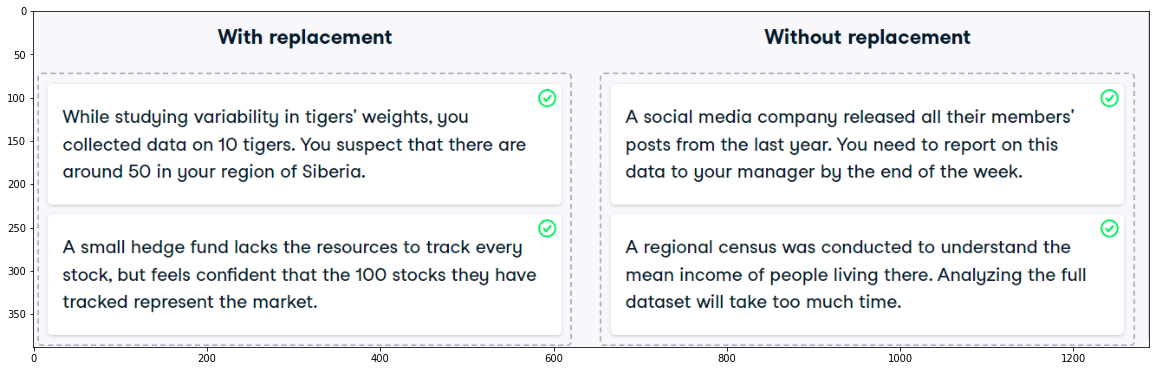

In [16]:
replacement = np.asarray(Image.open('replacement.png'))
plt.figure(figsize=[20,10])
plt.imshow(replacement) 
plt.show()  # display it

In [18]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

## Generating a bootstrap distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

spotify_sample is available; pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

#### Instructions
+ Generate a single bootstrap resample from spotify_sample.
+ Calculate the mean of the danceability column of spotify_1_resample using numpy.
+ Replicate the expression provided 1000 times.
+ Create a bootstrap distribution by drawing a histogram of mean_danceability_1000.
+ 

In [19]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
print(spotify_1_resample)

       acousticness                                     artists  danceability  \
12631       0.00030                          ['Built To Spill']         0.453   
16976       0.00179                            ['The Redwalls']         0.465   
33909       0.79200                         ['City and Colour']         0.654   
5920        0.00705                                 ['Sir Sly']         0.743   
19479       0.65200                        ['Silvio Rodríguez']         0.555   
...             ...                                         ...           ...   
30441       0.33100                               ['Neck Deep']         0.399   
12462       0.47700  ['Tommee Profitt', 'Fleurie', 'Mellen Gi']         0.618   
35537       0.11800                                ['Everlast']         0.739   
25182       0.03410                                  ['*NSYNC']         0.706   
18337       0.48000                          ['The Happy Fits']         0.834   

       duration_ms  duratio

In [20]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5767528999999999


In [21]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5946418000000001, 0.5844206, 0.5927718999999999, 0.5824711, 0.586576, 0.5838996999999999, 0.5858956000000001, 0.578448, 0.5718933, 0.5863959, 0.5807405, 0.5866875, 0.5785245, 0.5865027, 0.5888684000000001, 0.5875359, 0.5864756, 0.5761813000000001, 0.5923151, 0.5808852999999999, 0.5858357000000001, 0.5898127999999999, 0.5895861, 0.5907731, 0.5903231999999999, 0.5821408, 0.5883857, 0.5871852, 0.5876532, 0.585306, 0.5905887, 0.5910002999999999, 0.5946597999999998, 0.5798176, 0.5867686999999999, 0.5907148999999999, 0.5814566, 0.5813794, 0.5798890999999999, 0.5838312, 0.5886212000000001, 0.5850617, 0.5820590000000001, 0.5930744, 0.5887253, 0.5908594, 0.5825327000000001, 0.5965126000000001, 0.5890254000000001, 0.5832917999999999, 0.5786989000000001, 0.5887553, 0.5926948999999999, 0.5853404000000001, 0.5799591000000001, 0.5846047, 0.5958646, 0.5809147, 0.5804642, 0.5902763, 0.5916714, 0.592066, 0.5916158, 0.5949055, 0.5814098, 0.5843235999999999, 0.5854242000000001, 0.5830524, 0.5881312000

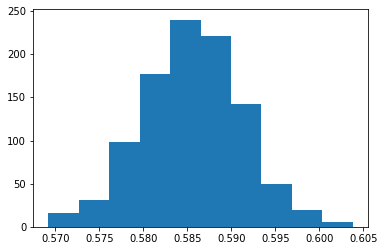

In [22]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

## Sampling distribution vs. bootstrap distribution
The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

spotify_population (the whole dataset) and spotify_sample (500 randomly sampled rows from spotify_population) are available; pandas and numpy are loaded with their usual aliases.

#### Instructions
+ Generate a sampling distribution of 2000 replicates.
+ Sample 500 rows of the population without replacement and calculate the mean popularity.
+ Generate a bootstrap distribution of 2000 replicates.
+ Sample 500 rows of the sample with replacement and calculate the mean popularity.

In [23]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[55.068, 54.39, 54.75, 54.614, 54.902, 55.946, 54.558, 55.228, 54.696, 55.456, 55.086, 55.39, 54.8, 54.868, 55.232, 54.982, 54.792, 54.812, 55.13, 54.388, 54.006, 54.852, 55.094, 55.372, 54.42, 54.34, 54.94, 54.296, 54.998, 54.802, 55.214, 54.672, 55.498, 54.342, 55.216, 55.47, 55.0, 55.016, 55.324, 53.5, 54.712, 55.266, 53.984, 54.91, 55.226, 55.056, 54.536, 55.484, 55.052, 54.806, 55.14, 54.422, 55.288, 55.118, 54.616, 54.662, 54.622, 54.686, 54.918, 55.002, 55.314, 54.87, 55.306, 54.994, 54.854, 54.596, 54.94, 54.536, 54.968, 55.174, 54.714, 55.456, 54.79, 54.39, 54.618, 55.44, 54.856, 55.452, 54.182, 54.776, 53.998, 54.43, 54.33, 55.1, 54.846, 55.03, 55.986, 54.612, 54.082, 54.796, 54.93, 54.636, 54.786, 55.93, 54.402, 54.828, 55.178, 54.7, 54.782, 54.674, 54.714, 54.776, 54.782, 54.71, 55.308, 54.966, 55.024, 55.456, 54.09, 54.52, 55.012, 54.456, 55.29, 54.524, 55.206, 55.246, 54.644, 54.056, 54.352, 54.884, 54.918, 54.804, 55.936, 55.558, 55.054, 54.194, 54.478, 54.614, 55.22, 55

In [24]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[54.304, 54.42, 55.488, 53.878, 54.768, 54.998, 54.672, 53.988, 54.648, 55.35, 55.068, 54.142, 54.978, 55.258, 55.002, 55.09, 55.148, 54.298, 54.484, 55.242, 54.572, 55.386, 54.586, 54.738, 54.638, 54.868, 55.376, 54.134, 54.754, 54.066, 55.408, 55.058, 54.702, 54.418, 53.962, 54.82, 54.786, 54.568, 54.61, 54.11, 55.534, 54.348, 53.85, 55.054, 55.362, 54.576, 54.552, 54.188, 54.048, 54.468, 54.14, 53.95, 55.326, 54.65, 55.39, 54.954, 55.314, 54.944, 55.246, 54.474, 54.53, 54.644, 53.91, 54.25, 54.688, 55.124, 55.126, 54.98, 55.228, 54.15, 55.732, 55.358, 54.456, 54.31, 54.536, 55.402, 54.384, 54.352, 55.29, 55.082, 55.254, 55.002, 55.078, 55.19, 54.666, 54.242, 54.316, 54.49, 54.978, 54.64, 55.576, 54.59, 55.222, 54.648, 54.198, 55.546, 54.418, 54.404, 56.056, 54.352, 54.98, 53.77, 55.764, 54.6, 55.044, 55.438, 55.238, 54.582, 55.27, 54.158, 55.324, 54.542, 54.716, 54.042, 55.146, 54.862, 55.14, 55.72, 54.958, 55.958, 54.756, 54.7, 54.194, 54.42, 54.534, 54.488, 54.81, 54.3, 55.02, 55.

## Compare sampling and bootstrap means
To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.

#### Instructions

+ Calculate the mean popularity in 4 ways:

    + Population: from spotify_population, take the mean of popularity.
    + Sample: from spotify_sample, take the mean of popularity.
    + Sampling distribution: from sampling_distribution, take its mean.
    + Bootstrap distribution: from bootstrap_distribution, take its mean.


In [ ]:
# Calculate the population mean popularity
pop_mean = np.mean(spotify_population['popularity'])

# Calculate the original sample mean popularity
samp_mean = np.mean(spotify_sample['popularity'])

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])


# [54.837142308430955, 54.8686, 54.83586444000001, 54.86607339999999]


#### Question
Based on the four means you just calculated (pop_mean, samp_mean, samp_distn_mean, and boot_distn_mean), which statement is true?

#### Answer
+ The sampling distribution mean is the best estimate of the true population mean; the bootstrap distribution mean is closest to the original sample mean.

## Compare sampling and bootstrap standard deviations
In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

Recall that the sample size is 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.

#### Instructions 

+ Calculate the standard deviation of popularity in 4 ways.

    + Population: from spotify_population, take the standard deviation of popularity.
    + Original sample: from spotify_sample, take the standard deviation of popularity.
    + Sampling distribution: from sampling_distribution, take its standard deviation and multiply by the square root of the sample size (5000).
    + Bootstrap distribution: from bootstrap_distribution, take its standard deviation and multiply by the square root of the sample size.

In [ ]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

#### Question
Based on the four results you just calculated (pop_sd, samp_sd, samp_distn_sd, and boot_distn_sd), which statement is true?

#### Answer
+ The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

## Calculating confidence intervals
You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm has been loaded from scipy.stats.

#### Instructions 
+ Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 0.025 quantile as lower_quant and the 0.975 quantile as upper_quant.
+ Generate a 95% confidence interval using the standard error method from the bootstrap distribution.
+ Calculate point_estimate as the mean of bootstrap_distribution, and standard_error as the standard deviation of bootstrap_distribution.
+ Calculate lower_se as the 0.025 quantile of an inv. CDF from a normal distribution with mean point_estimate and standard deviation standard_error.
+ Calculate upper_se as the 0.975 quantile of that same inv. CDF.

In [ ]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

In [ ]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)
# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se =  norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))